# Properties, Units and Labels

In [10]:
%load_ext autoreload
%autoreload 2

import numpy as np
import xplt

xplt.apply_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Properties are what makes this library easy to use while still very flexible.

A property is anything that we can "get" from a dataset, either as an attribute `data.xyz`, an index `data["xyz"]` or even a column in a pandas dataframe.  
For brevity, consider the following arbitrary dataset in the following:

In [11]:
# custom data
N = 10000
data = {
    "h": np.linspace(0, 100, num=N),
    "w": np.random.normal(size=N),
    "x": np.random.normal(size=N),
    "y": np.random.normal(size=N),
}

Now we can plot the x-y-phasespace simply by specifying exactly that:

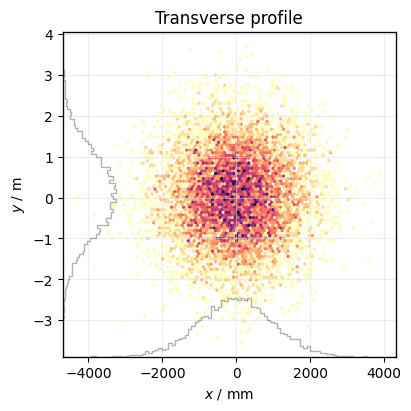

In [12]:
plot = xplt.PhaseSpacePlot(data, "x-y", display_units=dict(y="m"))

This works, because both `x` and `y` are standard properties which are defined in the library with default settings for units, labels and symbols.
Here specifically, the assumption is that `x` is provided in meters since that is the SI unit used by [Xsuite](https://xsuite.readthedocs.io), and that the default display unit for `x` should be millimeters. You can specify a display unit, and the data is automatically converted accordingly.

However, you can also add or change properties and their respective units, labels and symbols if required.
Futher, derived properties can easily be defined building on the already existing ones.

## Adding custom data properties

To define or overwrite properties of a data object with a certain units or meaning, you can either register them globally:

In [13]:
# data["w"] is the width in km
xplt.register_data_property("w", data_unit="km", symbol="$w_x$", description="Width")

Or on-the-fly for a single plot with the `data_units` parameter.
Both enable automatic axes and legend labeling, as well as the use of the `display_units` parameter:

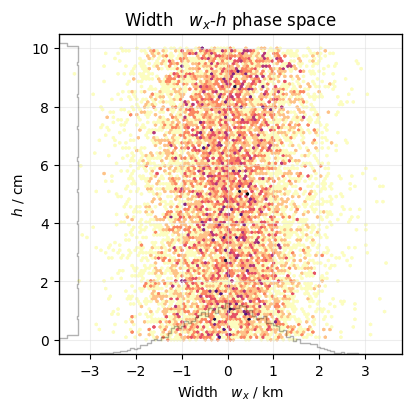

In [14]:
plot = xplt.PhaseSpacePlot(data, "w-h", data_units={"h": "mm"}, display_units={"h": "cm"})

## Derived properties

It is often useful to add properties that depend on already existing ones,
e.g. if you simply want to plot the squareroot of a parameter, or have a complex expression.
The function parameters must be valid property names, such that the data and units can be inferred automatically.
It is also possible to specify the unit explicitly where necessary.

In [15]:
xplt.register_derived_property(
    "A", lambda x, y: x * y
)  # since both x and y are know properties (in units of meter), A is known to be in meter²
xplt.register_derived_property(
    "B", lambda A: A + 6, unit="m^2"
)  # since the unit of `6` can not be inferred, we declare B to be in meter² too

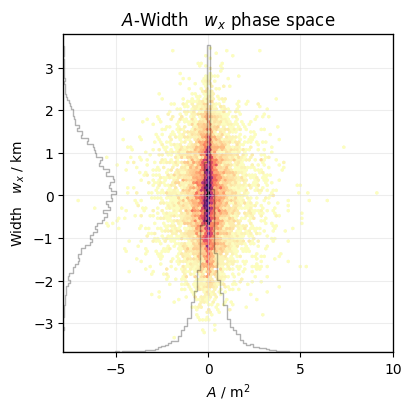

In [16]:
plot = xplt.PhaseSpacePlot(data, "A-w")

## Default properties

A list of the default global properties:

In [17]:
for name, prop in sorted(xplt.properties._default_properties.items()):
    print(f"   {name:15s}  {prop}")

   alfx             DataProperty($\alpha_x$, unit=1)
   alfy             DataProperty($\alpha_y$, unit=1)
   at_turn          DataProperty($n$, unit=1, description=Turn)
   betx             DataProperty($\beta_x$, unit=m)
   bety             DataProperty($\beta_y$, unit=m)
   charge_ratio     DataProperty($q/q_\mathrm{ref}$, unit=1, description=Charge ratio)
   chi              DataProperty($q/q_\mathrm{ref} \cdot m_\mathrm{ref}/m$, unit=1, description=Charge-over-rest-mass ratio)
   count            DataProperty($N$, unit=1, description=Count)
   delta            DataProperty($\delta$, unit=1)
   dpx              DataProperty($D_{x'}$, unit=1)
   dpy              DataProperty($D_{y'}$, unit=1)
   dx               DataProperty($D_x$, unit=m)
   dy               DataProperty($D_y$, unit=m)
   energy           DataProperty($E$, unit=eV, description=Total energy)
   gamx             DataProperty($\gamma_x$, unit=1/m)
   gamy             DataProperty($\gamma_y$, unit=1/m)
   m             

A list of properties available for particle data related plots (ParticlesPlot, PhaseSpacePlot, etc.):

In [18]:
plot = xplt.particles.ParticlesPlot()
for p in sorted(plot._default_properties):
    print(f"   {p:15s}  {plot.prop(p)}")
xplt.mpl.pyplot.close()

   Jx               DerivedProperty($J_x$, unit=m)
   Jy               DerivedProperty($J_y$, unit=m)
   Px               DerivedProperty($X'$, unit=m^(1/2))
   Py               DerivedProperty($Y'$, unit=m^(1/2))
   X                DerivedProperty($X$, unit=m^(1/2))
   Y                DerivedProperty($Y$, unit=m^(1/2))
   t                DerivedProperty($t$, unit=s)
   zeta_wrapped     DerivedProperty($\zeta$, unit=m)
   Θx               DerivedProperty($Θ_x$, unit=rad)
   Θy               DerivedProperty($Θ_y$, unit=rad)


Futher properties are listed in the documentation of each plot